In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM

Using Theano backend.


In [2]:
import datetime as dt

In [3]:
start = dt.date(2013, 9, 20)

In [4]:
end = dt.date(2017, 9, 19)

In [6]:
spy = pdr.DataReader('SPY', 'yahoo', start, end)

In [7]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-09-20,172.330002,172.330002,170.580002,170.720001,157.500931,132867100
2013-09-23,170.490005,170.649994,169.389999,169.929993,156.772095,104616500
2013-09-24,169.899994,170.529999,169.210007,169.529999,156.403091,106333100
2013-09-25,169.639999,169.979996,168.889999,169.039993,155.951004,117306500
2013-09-26,169.320007,170.169998,169.050003,169.690002,156.550705,77146900


In [8]:
spy.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-13,249.720001,250.210007,249.589996,250.169998,248.934601,59228000
2017-09-14,249.800003,250.320007,249.600006,250.089996,248.854996,95446300
2017-09-15,248.690002,249.289993,248.570007,249.190002,249.190002,95432400
2017-09-18,249.610001,250.119995,249.279999,249.720001,249.720001,46235200
2017-09-19,250.000000,250.070007,249.600006,249.970001,249.970001,42035000


In [22]:
data = spy.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)

In [25]:
data = data.rename(columns={'Adj Close': 'SPY'})

In [26]:
data.head()

,SPY
Date,
2013-09-20,157.500931
2013-09-23,156.772095
2013-09-24,156.403091
2013-09-25,155.951004
2013-09-26,156.550705


In [27]:
type(data)

pandas.core.frame.DataFrame

In [28]:
yt_1 = data.shift(1)

In [30]:
yt_2 = data.shift(2)

In [31]:
yt_3 = data.shift(3)

In [32]:
yt_4 = data.shift(4)

In [33]:
yt_5 = data.shift(5)

In [34]:
d1 = pd.concat([data,yt_1,yt_2,yt_3,yt_4,yt_5], axis=1)

In [35]:
d1.head()

,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2013-09-20,157.500931,NaN,NaN,NaN,NaN,NaN
2013-09-23,156.772095,157.500931,NaN,NaN,NaN,NaN
2013-09-24,156.403091,156.772095,157.500931,NaN,NaN,NaN
2013-09-25,155.951004,156.403091,156.772095,157.500931,NaN,NaN
2013-09-26,156.550705,155.951004,156.403091,156.772095,157.500931,NaN


In [36]:
d1.columns = ['yt','yt_1','yt_2','yt_3','yt_4','yt5']

In [37]:
d1.head()

,yt,yt_1,yt_2,yt_3,yt_4,yt5
Date,,,,,,
2013-09-20,157.500931,NaN,NaN,NaN,NaN,NaN
2013-09-23,156.772095,157.500931,NaN,NaN,NaN,NaN
2013-09-24,156.403091,156.772095,157.500931,NaN,NaN,NaN
2013-09-25,155.951004,156.403091,156.772095,157.500931,NaN,NaN
2013-09-26,156.550705,155.951004,156.403091,156.772095,157.500931,NaN


In [38]:
d1 = d1.dropna()

In [39]:
y = d1['yt']

In [40]:
cols = ['yt_1','yt_2','yt_3','yt_4','yt5']

In [41]:
x = d1[cols]

In [42]:
x.head()

,yt_1,yt_2,yt_3,yt_4,yt5
Date,,,,,
2013-09-27,156.550705,155.951004,156.403091,156.772095,157.500931
2013-09-30,155.831100,156.550705,155.951004,156.403091,156.772095
2013-10-01,155.000748,155.831100,156.550705,155.951004,156.403091
2013-10-02,156.227814,155.000748,155.831100,156.550705,155.951004
2013-10-03,156.080200,156.227814,155.000748,155.831100,156.550705


In [43]:
scaler_x = preprocessing.MinMaxScaler(feature_range=(-1, 1))

In [44]:
x = np.array(x).reshape((len(x), 5))

In [45]:
x = scaler_x.fit_transform(x)

In [46]:
scaler_y = preprocessing.MinMaxScaler(feature_range=(-1, 1))

In [47]:
y = np.array(y).reshape((len(y), 1))

In [48]:
y = scaler_y.fit_transform(y)

In [49]:
len(d1)

1002

In [50]:
len(x)

1002

In [51]:
1002 * .95

951.9

In [52]:
train_end = 952

In [53]:
x_train = x[0:train_end,]

In [54]:
x_test = x[train_end+1:1002,]

In [55]:
y_train = y[0:train_end]

In [56]:
y_test = y[train_end+1:1002]

In [57]:
x_train = x_train.reshape(x_train.shape + (1,))

In [58]:
x_test = x_test.reshape(x_test.shape + (1,))

In [59]:
seed=2016

In [60]:
np.random.seed(seed)

In [61]:
fit1 = Sequential()

In [62]:
fit1.add(LSTM(units=4, stateful=True, batch_input_shape=(1,5,1), activation='tanh', inner_activation='hard_sigmoid'))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=4, batch_input_shape=(1, 5, 1), stateful=True, recurrent_activation="hard_sigmoid", activation="tanh")`
  """Entry point for launching an IPython kernel.


In [63]:
fit1.add(Dense(units=1, activation='linear'))

In [64]:
fit1.compile(loss='mean_squared_error', optimizer='rmsprop')

In [65]:
end_point = len(x_train)

In [66]:
start_point = end_point-100

In [68]:
for i in range(len(x_train[start_point:end_point])):
    print('Fitting example ', i)
    fit1.fit(x_train[start_point:end_point], y_train[start_point:end_point], epochs=1, batch_size=1, verbose=2, shuffle=True)
    fit1.reset_states()

Fitting example  0
Epoch 1/1
0s - loss: 0.0025
Fitting example  1
Epoch 1/1
0s - loss: 0.0027
Fitting example  2
Epoch 1/1
0s - loss: 0.0029
Fitting example  3
Epoch 1/1
0s - loss: 0.0026
Fitting example  4
Epoch 1/1
0s - loss: 0.0022
Fitting example  5
Epoch 1/1
0s - loss: 0.0023
Fitting example  6
Epoch 1/1
0s - loss: 0.0023
Fitting example  7
Epoch 1/1
0s - loss: 0.0020
Fitting example  8
Epoch 1/1
0s - loss: 0.0020
Fitting example  9
Epoch 1/1
0s - loss: 0.0020
Fitting example  10
Epoch 1/1
0s - loss: 0.0017
Fitting example  11
Epoch 1/1
0s - loss: 0.0019
Fitting example  12
Epoch 1/1
0s - loss: 0.0020
Fitting example  13
Epoch 1/1
0s - loss: 0.0018
Fitting example  14
Epoch 1/1
0s - loss: 0.0016
Fitting example  15
Epoch 1/1
0s - loss: 0.0017
Fitting example  16
Epoch 1/1
0s - loss: 0.0017
Fitting example  17
Epoch 1/1
0s - loss: 0.0019
Fitting example  18
Epoch 1/1
0s - loss: 0.0015
Fitting example  19
Epoch 1/1
0s - loss: 0.0018
Fitting example  20
Epoch 1/1
0s - loss: 0.0016
Fi

In [69]:
pred1 = fit1.predict(x_test, batch_size=1)

In [70]:
pred1 = scaler_y.inverse_transform(np.array(pred1).reshape((len(pred1), 1)))

In [71]:
pred1 = np.ndarray.flatten(pred1)

In [72]:
pred1 = pd.Series(pred1)

In [73]:
data['prediction'] = np.nan

In [74]:
len(data)

1007

In [75]:
len(pred1)

49

In [76]:
data['prediction'][958:] = pred1

In [77]:
df2.tail()

NameError: name 'df2' is not defined

In [78]:
data.tail()

,SPY,prediction
Date,,
2017-09-13,248.934601,245.336594
2017-09-14,248.854996,246.193512
2017-09-15,249.190002,246.522125
2017-09-18,249.720001,246.524307
2017-09-19,249.970001,246.952530


In [79]:
data.head()

,SPY,prediction
Date,,
2013-09-20,157.500931,NaN
2013-09-23,156.772095,NaN
2013-09-24,156.403091,NaN
2013-09-25,155.951004,NaN
2013-09-26,156.550705,NaN


In [83]:
data.plot(figsize=(9,9))

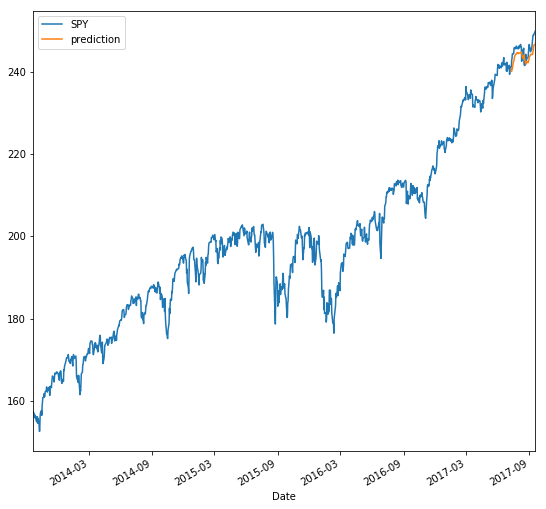

In [84]:
plt.show()